<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/HM_Numerical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handling Missing Numerical Data

Handling missing numerical data is an important step in data preprocessing. Here are some common techniques:

1.  **Deletion:**
    *   **Row-wise Deletion (Listwise Deletion):** If a row contains any missing values, the entire row is removed. This is simple but can lead to significant data loss if many rows have missing values.
    *   **Column-wise Deletion:** If a column has too many missing values (e.g., more than 50-70%), it might be removed entirely. This is done when the column is deemed not useful due to sparsity.

2.  **Imputation:** Replacing missing values with estimated values.
    *   **Mean/Median Imputation:** Replace missing values with the mean or median of the non-missing values in that column. Mean is sensitive to outliers, while median is more robust. This is suitable for numerical data but can reduce variance and distort relationships.
    *   **Mode Imputation:** Replace missing values with the most frequent value in the column. This is more commonly used for categorical data but can be applied to numerical data if it has a clear mode.
    *   **Constant Value Imputation:** Replace missing values with a constant value (e.g., 0, or a specific placeholder). This might be useful if the absence of a value itself carries information.
    *   **Forward Fill / Backward Fill (for time series data):** Replace missing values with the previous (forward fill) or next (backward fill) observed value in the column. Useful for ordered data like time series.
    *   **Regression Imputation:** Predict missing values using a regression model based on other features in the dataset. This is more sophisticated but can be complex and may introduce bias.
    *   **K-Nearest Neighbors (KNN) Imputation:** Impute missing values by finding the K-nearest neighbors to the observation with the missing value and using the average (or weighted average) of their values.

3.  **Advanced Methods:**
    *   **Multiple Imputation by Chained Equations (MICE):** A sophisticated method that iteratively imputes missing values using a series of regression models, producing multiple complete datasets.
    *   **Deep Learning based Imputation:** Using neural networks to learn complex patterns and impute missing values.

**Considerations when choosing a method:**
*   **Amount of missing data:** If a small percentage is missing, simpler methods might suffice. If a large percentage is missing, more advanced methods or even dropping the data might be necessary.
*   **Nature of the data:** Is it time series? Are there outliers? Is the distribution skewed?
*   **Reason for missingness:** Is the data missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR)? The imputation method choice can depend on this.
*   **Impact on analysis:** How will the imputation method affect the statistical properties, relationships, and model performance?

It's often good practice to experiment with different methods and evaluate their impact on your analysis or model performance.

### When to use Mean or Median Imputation?

Choosing between mean and median imputation largely depends on the distribution of your data and the presence of outliers.

*   **Mean Imputation:**
    *   **When to use:** The mean is a good choice for imputation when the data distribution is **symmetrical** (e.g., normally distributed) and does **not contain significant outliers**. In such cases, the mean accurately represents the central tendency of the data, and using it for imputation will minimally distort the dataset's statistical properties.
    *   **Pros:** Simple to implement, computationally inexpensive.
    *   **Cons:** Highly sensitive to outliers. If your data has extreme values, the mean will be pulled towards these outliers, and using it for imputation will introduce bias and incorrectly shift the distribution of the imputed variable.

*   **Median Imputation:**
    *   **When to use:** The median is the preferred choice when the data distribution is **skewed** (either positively or negatively) or when the data **contains outliers**. The median is a robust measure of central tendency, meaning it is less affected by extreme values compared to the mean.
    *   **Pros:** More robust to outliers and skewed distributions. It maintains the original distribution's shape better than the mean in such scenarios.
    *   **Cons:** Can be slightly more computationally intensive than the mean for very large datasets, though this is often negligible. Like mean imputation, it can reduce variance and weaken correlations if not used carefully.

**In summary:**

*   **Symmetric, no outliers?** Go with the **Mean**.
*   **Skewed or with outliers?** Choose the **Median**.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [80]:
df=pd.read_csv("titanic_toy.csv")

In [81]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [83]:
df.columns

Index(['Age', 'Fare', 'Family', 'Survived'], dtype='object')

In [84]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [85]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [88]:
X_train.isnull().mean()

,0
Age,0.196629
Fare,0.050562
Family,0.000000


In [89]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [90]:
X_train['Age_median']=X_train['Age'].fillna(median_age)
X_train['Age_mean']=X_train['Age'].fillna(mean_age)

X_train['Fare_median']=X_train['Fare'].fillna(median_fare)
X_train['Fare_mean']=X_train['Fare'].fillna(mean_fare)

In [91]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
843,34.50,6.4375,0,34.50,34.50,6.4375,6.437500
469,0.75,NaN,3,0.75,0.75,14.4000,32.517788
565,24.00,24.1500,2,24.00,24.00,24.1500,24.150000
672,70.00,10.5000,0,70.00,70.00,10.5000,10.500000
216,27.00,7.9250,0,27.00,27.00,7.9250,7.925000


In [92]:
print('Original Age variable variance',X_train['Age'].var())
print('Age imputed with median variance',X_train['Age_median'].var())
print('Age imputed with mean variance',X_train['Age_mean'].var())

print('Original Fare variable variance',X_train['Fare'].var())
print('Fare imputed with median variance',X_train['Fare_median'].var())
print('Fare imputed with mean variance',X_train['Fare_mean'].var())

Original Age variable variance 210.2517072477438
Age imputed with median variance 169.20731007048096
Age imputed with mean variance 168.8519336687225
Original Fare variable variance 2761.031434948639
Fare imputed with median variance 2637.01248167777
Fare imputed with mean variance 2621.2323749512393


### Impact of Imputation on Variance

These lines of code compare the variance of the 'Age' and 'Fare' variables before and after mean and median imputation.

*   **Variance:** Variance is a measure of how spread out the data points are in a dataset. A higher variance indicates that the data points are widely spread from the mean, while a lower variance suggests that they are clustered closer to the mean.

*   **`X_train['Age'].var()` / `X_train['Fare'].var()`:** These show the original variance of the 'Age' and 'Fare' columns in the training set before any imputation.

*   **`X_train['Age_median'].var()` / `X_train['Fare_median'].var()`:** These show the variance of the 'Age' and 'Fare' columns after missing values have been filled using the *median* of the respective column.

*   **`X_train['Age_mean'].var()` / `X_train['Fare_mean'].var()`:** These show the variance of the 'Age' and 'Fare' columns after missing values have been filled using the *mean* of the respective column.

**Observation and Explanation:**

You typically observe that the variance of the imputed columns (both mean and median) is **lower** than the original variance. This is a common characteristic of simple imputation techniques like mean or median imputation:

*   When you replace missing values with a single constant value (like the mean or median), you are essentially adding data points that are exactly the same. This reduces the overall spread or variability of the data, hence decreasing the variance.
*   This reduction in variance can sometimes be undesirable, as it might underestimate the true variability of the data and weaken correlations with other variables, potentially impacting the performance of machine learning models. Therefore, while simple, these methods should be used with an understanding of their effects on the data's statistical properties.

#Fare Distribution

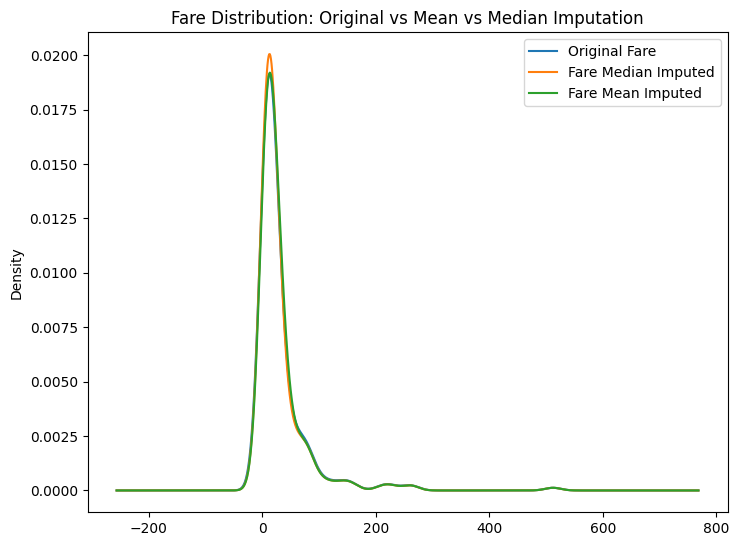

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax, label='Original Fare')

# Variable imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax, label='Fare Median Imputed')

# Variable imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, label='Fare Mean Imputed')

ax.legend()
ax.set_title('Fare Distribution: Original vs Mean vs Median Imputation')

plt.show()


#Age Distribution

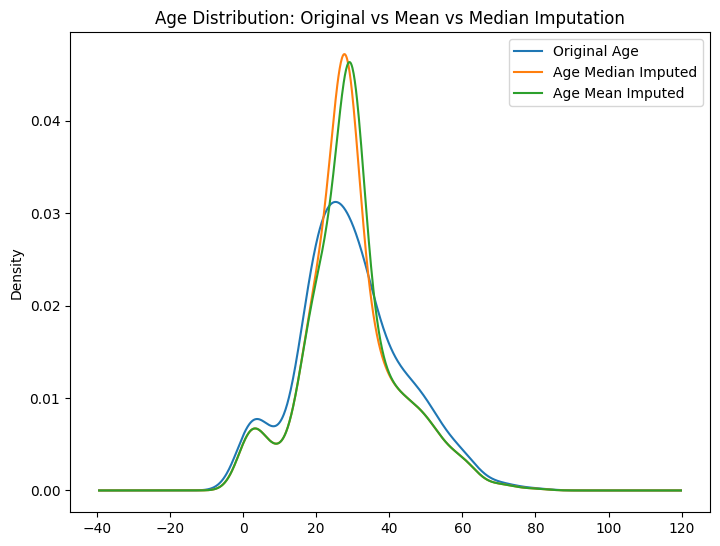

In [94]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Original Age distribution
X_train['Age'].plot(kind='kde', ax=ax, label='Original Age')

# Age imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax, label='Age Median Imputed')

# Age imputed with mean
X_train['Age_mean'].plot(kind='kde', ax=ax, label='Age Mean Imputed')

ax.legend()
ax.set_title('Age Distribution: Original vs Mean vs Median Imputation')

plt.show()


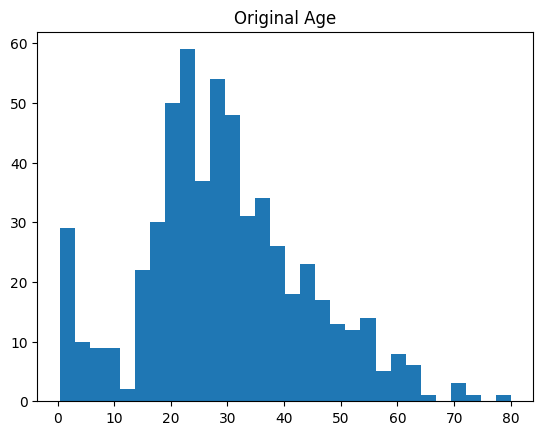

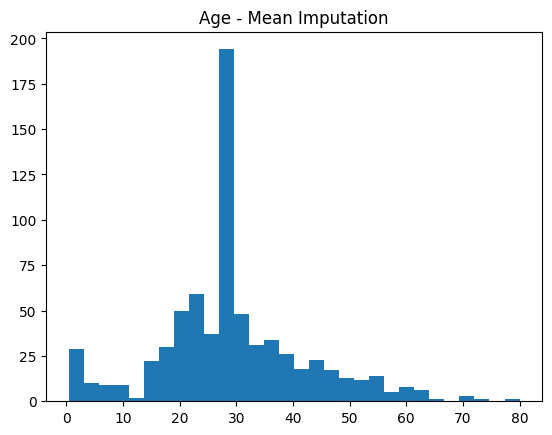

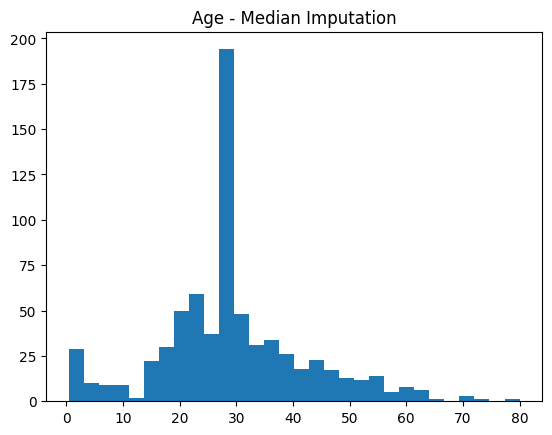

In [95]:
import matplotlib.pyplot as plt

plt.hist(X_train['Age'], bins=30)
plt.title("Original Age")
plt.show()

plt.hist(X_train['Age_mean'], bins=30)
plt.title("Age - Mean Imputation")
plt.show()

plt.hist(X_train['Age_median'], bins=30)
plt.title("Age - Median Imputation")
plt.show()


#Covariance

In [96]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [97]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


#Age outliers

<Axes: >

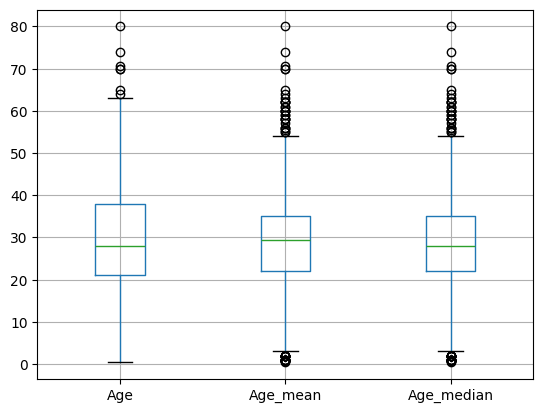

In [98]:
X_train[['Age','Age_mean','Age_median']].boxplot()

In [99]:
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


In [100]:
for col in ['Age', 'Age_mean', 'Age_median']:
    lower, upper = iqr_outliers(X_train[col])
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col} → Outliers count: {outliers.shape[0]}")


Age → Outliers count: 7
Age_mean → Outliers count: 54
Age_median → Outliers count: 54


In [101]:
from scipy.stats import zscore

for col in ['Age', 'Age_mean', 'Age_median']:
    z_scores = zscore(X_train[col].dropna())
    outliers = (abs(z_scores) > 3).sum()
    print(f"{col} → Outliers (Z > 3): {outliers}")


Age → Outliers (Z > 3): 2
Age_mean → Outliers (Z > 3): 5
Age_median → Outliers (Z > 3): 5


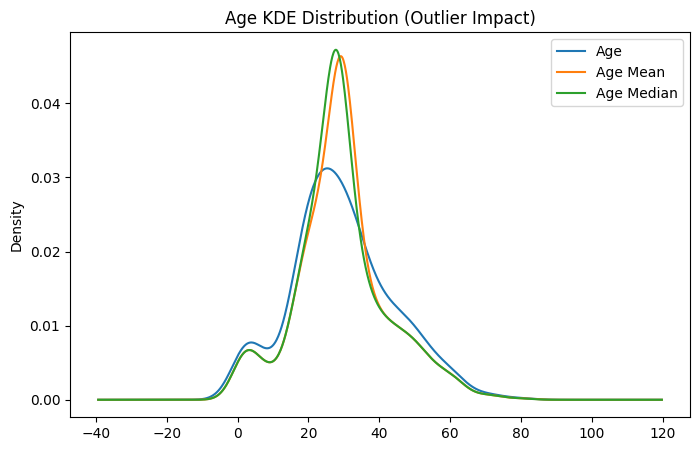

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

X_train['Age'].plot(kind='kde', ax=ax, label='Age')
X_train['Age_mean'].plot(kind='kde', ax=ax, label='Age Mean')
X_train['Age_median'].plot(kind='kde', ax=ax, label='Age Median')

ax.legend()
ax.set_title('Age KDE Distribution (Outlier Impact)')
plt.show()


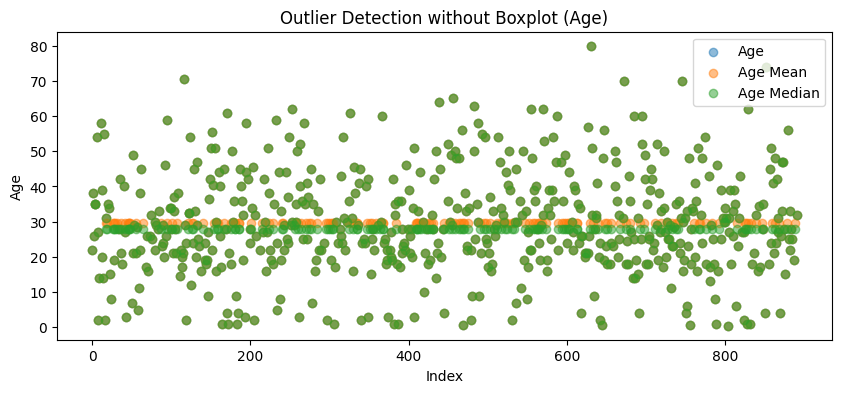

In [103]:
plt.figure(figsize=(10,4))

plt.scatter(X_train.index, X_train['Age'], label='Age', alpha=0.5)
plt.scatter(X_train.index, X_train['Age_mean'], label='Age Mean', alpha=0.5)
plt.scatter(X_train.index, X_train['Age_median'], label='Age Median', alpha=0.5)

plt.legend()
plt.title('Outlier Detection without Boxplot (Age)')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()


#Fare Outliers

<Axes: >

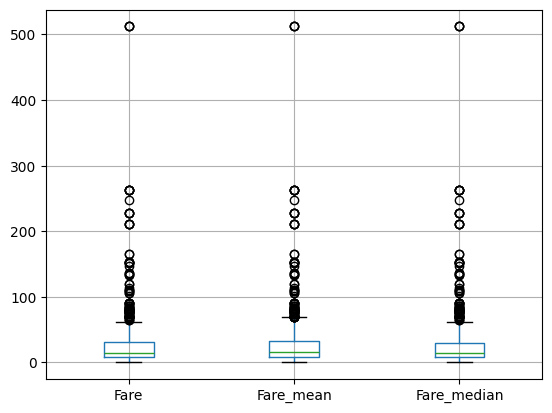

In [104]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

In [105]:
def iqr_limits(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper


In [106]:
for col in ['Fare', 'Fare_mean', 'Fare_median']:
    lower, upper = iqr_limits(X_train[col])
    outliers = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    print(f"{col} → Outliers count: {outliers.shape[0]}")


Fare → Outliers count: 90
Fare_mean → Outliers count: 85
Fare_median → Outliers count: 90


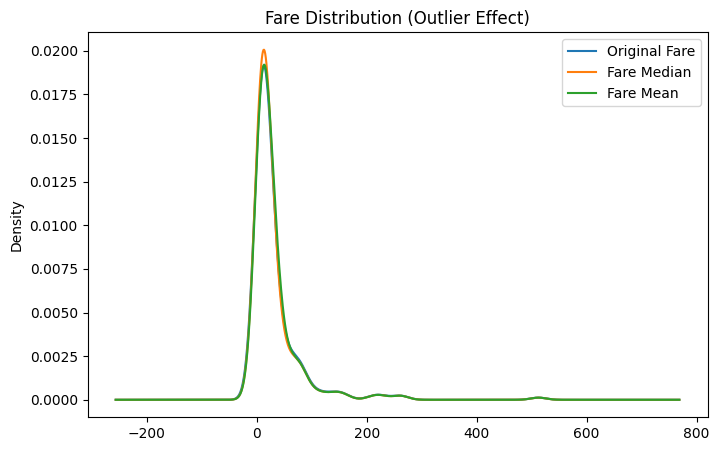

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,5))

X_train['Fare'].plot(kind='kde', ax=ax, label='Original Fare')
X_train['Fare_median'].plot(kind='kde', ax=ax, label='Fare Median')
X_train['Fare_mean'].plot(kind='kde', ax=ax, label='Fare Mean')

ax.legend()
ax.set_title('Fare Distribution (Outlier Effect)')
plt.show()


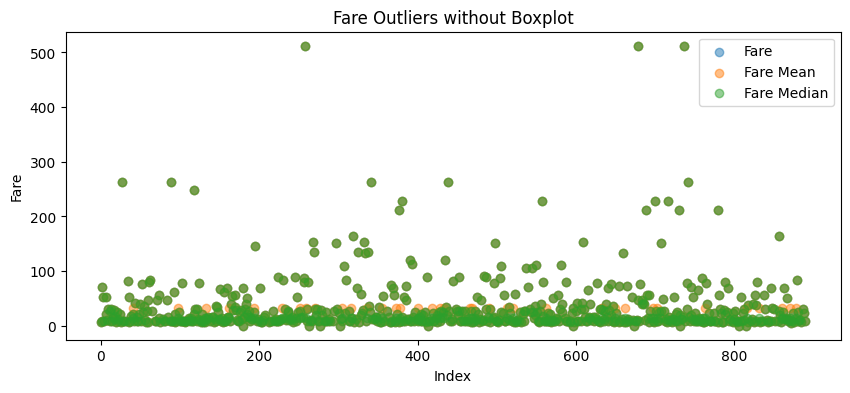

In [108]:
plt.figure(figsize=(10,4))

plt.scatter(X_train.index, X_train['Fare'], alpha=0.5, label='Fare')
plt.scatter(X_train.index, X_train['Fare_mean'], alpha=0.5, label='Fare Mean')
plt.scatter(X_train.index, X_train['Fare_median'], alpha=0.5, label='Fare Median')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Fare')
plt.title('Fare Outliers without Boxplot')
plt.show()


In [109]:
from sklearn.impute import SimpleImputer


In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [112]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [119]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf  = trf.transform(X_test)


In [121]:
trf.get_feature_names_out()


array(['imputer1__Age', 'imputer2__Fare', 'remainder__Family'],
      dtype=object)

In [113]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [120]:
X_train_trf.shape


(712, 3)

In [122]:
X_train_trf = pd.DataFrame(
    X_train_trf,
    columns=trf.get_feature_names_out()
)

X_test_trf = pd.DataFrame(
    X_test_trf,
    columns=trf.get_feature_names_out()
)


In [123]:
X_train_trf.isnull().sum()


,0
imputer1__Age,0
imputer2__Fare,0
remainder__Family,0


In [124]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_trf, y_train)

y_pred = model.predict(X_test_trf)


In [125]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6536312849162011

In [114]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [115]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [116]:
X_train_trf=trf.transform(X_train)
X_test_trf=trf.transform(X_test)

In [117]:
X_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [126]:
X_train[['Age','Fare']].isnull().sum()
X_test[['Age','Fare']].isnull().sum()


,0
Age,37
Fare,9


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_features = ['Age','Fare']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
        ('scaler', StandardScaler())
    ]), num_features)
], remainder='passthrough')

model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.6368715083798883